In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
venezuela_tweets = pd.read_csv('/Users/alessandro/Downloads/venezuela_201906_1_tweets_csv_hashed.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
venezuela_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569455 entries, 0 to 569454
Data columns (total 31 columns):
tweetid                     569455 non-null int64
userid                      569455 non-null object
user_display_name           569455 non-null object
user_screen_name            569455 non-null object
user_reported_location      261836 non-null object
user_profile_description    526220 non-null object
user_profile_url            486822 non-null object
follower_count              569455 non-null int64
following_count             569455 non-null int64
account_creation_date       569455 non-null object
account_language            569455 non-null object
tweet_language              568701 non-null object
tweet_text                  569455 non-null object
tweet_time                  569455 non-null object
tweet_client_name           569455 non-null object
in_reply_to_userid          171 non-null float64
in_reply_to_tweetid         125 non-null float64
quoted_tweet_tweetid        3

In [4]:
venezuela_tweets.count()

tweetid                     569455
userid                      569455
user_display_name           569455
user_screen_name            569455
user_reported_location      261836
user_profile_description    526220
user_profile_url            486822
follower_count              569455
following_count             569455
account_creation_date       569455
account_language            569455
tweet_language              568701
tweet_text                  569455
tweet_time                  569455
tweet_client_name           569455
in_reply_to_userid             171
in_reply_to_tweetid            125
quoted_tweet_tweetid            32
is_retweet                  569455
retweet_userid               28961
retweet_tweetid              28961
latitude                    569455
longitude                   569455
quote_count                 569455
reply_count                 569455
like_count                  569455
retweet_count               569455
hashtags                    568243
urls                

In [5]:
venezuela_tweets['tweet_text']

0         Truth About “Right to Healthcare” Every Lib Ne...
1         BREAKING: Air Force Makes Tragic Announcement,...
2         HAPPENING NOW: Disney Facing a Scandal So Cata...
3         Another Stupid Gun Control Cartoon From the Le...
4         ➡️ 90 POUNDS OF COCAINE FOUND ON SHIP OWNED BY...
5         Michael Moore Offers to Pay $1,000 Fine for El...
6         Nancy Pelosi to Continue to Lead House Democra...
7         WATCH: 9 Pro-Trump States Just DEFIED Illegal ...
8         Stupid Hillary Gives Away Mosul Strategy, ISIS...
9         HILLARY CLINTON ONE LAST HURRAH https://t.co/y...
10        Former CIA Director Said More Than 1 Country C...
11        WATCH – Country Singer Ray Stevens Releases TH...
12        "Trey Gowdy Just Made A Major Move To Stop Oba...
13        "ALERT: Top Anti-Trump Republican Took Money F...
14        KNOCK-KNOCK: Look Who Just Got a Visit From th...
15        "Lawrence: Hurricane Irma And Harvey Were The ...
16        LIVE STREAM VIDEO: Roger Stone

In [6]:
venezuela_tweets.head(100)

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
0,841279580644171777,828668571765133317,TRUMP TRAIN 🚂,TRUMPTRAIN_17,"Texas, USA",Lets help @realDonaldTrump Make America Great ...,https://t.co/ZkpEZdjz6R,5059,4718,2017-02-06,...,absent,absent,0,0,0,1,[],['http://USA.TrumpNewss.com/63V'],[],NaN
1,933065474744684544,892133369965944833,Lauren4Trump🍒,Laureen4Trump,NaN,100% Support @realDonaldTrump✨ 2020 Vision for...,https://t.co/vC8RybJYHo,40710,37628,2017-07-31,...,absent,absent,0,0,0,1,[],['http://zpr.io/nG7gc'],[],NaN
2,1020373357144018945,892133369965944833,Lauren4Trump🍒,Laureen4Trump,NaN,100% Support @realDonaldTrump✨ 2020 Vision for...,https://t.co/vC8RybJYHo,40710,37628,2017-07-31,...,absent,absent,0,1,7,4,[],['http://zpr.io/6xjYq'],[],NaN
3,927862406268751872,896121971989262336,Emma🌺| Reporter👩‍💻,EmmaTurnerBN,NaN,YUGE Trump Supporter since the day Trump annou...,https://t.co/vC8RybJYHo,34770,32618,2017-08-11,...,absent,absent,0,0,1,1,[],['http://zpr.io/nRxP4'],[],NaN
4,845268272664633345,768237282562310144,#TrumpNews 🇺🇸,GODBLESSAMERIC,"Washington, DC",Daily political news. #TrumpPence16 #GodBlessA...,https://t.co/XLyfrLF834,15246,11249,2016-08-24,...,absent,absent,0,1,2,1,[],['http://POTUS.TrumpNewss.com/Nnl'],[],NaN
5,810901576273436673,768237282562310144,#TrumpNews 🇺🇸,GODBLESSAMERIC,"Washington, DC",Daily political news. #TrumpPence16 #GodBlessA...,https://t.co/XLyfrLF834,15246,11249,2016-08-24,...,absent,absent,1,1,0,0,[],['http://USA.TrumpNewss.com/qrZk61'],[],NaN
6,798200373194301441,768237282562310144,#TrumpNews 🇺🇸,GODBLESSAMERIC,"Washington, DC",Daily political news. #TrumpPence16 #GodBlessA...,https://t.co/XLyfrLF834,15246,11249,2016-08-24,...,absent,absent,0,0,3,1,[],['http://www.Feed24hNews.com/99pt8'],[],NaN
7,830902962574680064,768237282562310144,#TrumpNews 🇺🇸,GODBLESSAMERIC,"Washington, DC",Daily political news. #TrumpPence16 #GodBlessA...,https://t.co/XLyfrLF834,15246,11249,2016-08-24,...,absent,absent,0,1,3,2,[],['http://POTUS.TrumpNewss.com/F2B'],[],NaN
8,789612256157773824,768237282562310144,#TrumpNews 🇺🇸,GODBLESSAMERIC,"Washington, DC",Daily political news. #TrumpPence16 #GodBlessA...,https://t.co/XLyfrLF834,15246,11249,2016-08-24,...,absent,absent,0,0,3,6,[],['http://www.Feed24hNews.com/37Wvb'],[],NaN
9,797588068286930944,768237282562310144,#TrumpNews 🇺🇸,GODBLESSAMERIC,"Washington, DC",Daily political news. #TrumpPence16 #GodBlessA...,https://t.co/XLyfrLF834,15246,11249,2016-08-24,...,absent,absent,0,0,0,0,[],['http://www.Feed24hNews.com/9VNj6'],[],NaN


In [7]:
venezuela_tweets.user_screen_name.nunique()

33

In [8]:
venezuela_tweets['Trump_in_Tweet'] = venezuela_tweets.tweet_text.apply(lambda x: 'trump' in x.lower())
venezuela_tweets.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices,Trump_in_Tweet
0,841279580644171777,828668571765133317,TRUMP TRAIN 🚂,TRUMPTRAIN_17,"Texas, USA",Lets help @realDonaldTrump Make America Great ...,https://t.co/ZkpEZdjz6R,5059,4718,2017-02-06,...,absent,0,0,0,1,[],['http://USA.TrumpNewss.com/63V'],[],NaN,False
1,933065474744684544,892133369965944833,Lauren4Trump🍒,Laureen4Trump,NaN,100% Support @realDonaldTrump✨ 2020 Vision for...,https://t.co/vC8RybJYHo,40710,37628,2017-07-31,...,absent,0,0,0,1,[],['http://zpr.io/nG7gc'],[],NaN,False
2,1020373357144018945,892133369965944833,Lauren4Trump🍒,Laureen4Trump,NaN,100% Support @realDonaldTrump✨ 2020 Vision for...,https://t.co/vC8RybJYHo,40710,37628,2017-07-31,...,absent,0,1,7,4,[],['http://zpr.io/6xjYq'],[],NaN,False
3,927862406268751872,896121971989262336,Emma🌺| Reporter👩‍💻,EmmaTurnerBN,NaN,YUGE Trump Supporter since the day Trump annou...,https://t.co/vC8RybJYHo,34770,32618,2017-08-11,...,absent,0,0,1,1,[],['http://zpr.io/nRxP4'],[],NaN,False
4,845268272664633345,768237282562310144,#TrumpNews 🇺🇸,GODBLESSAMERIC,"Washington, DC",Daily political news. #TrumpPence16 #GodBlessA...,https://t.co/XLyfrLF834,15246,11249,2016-08-24,...,absent,0,1,2,1,[],['http://POTUS.TrumpNewss.com/Nnl'],[],NaN,False


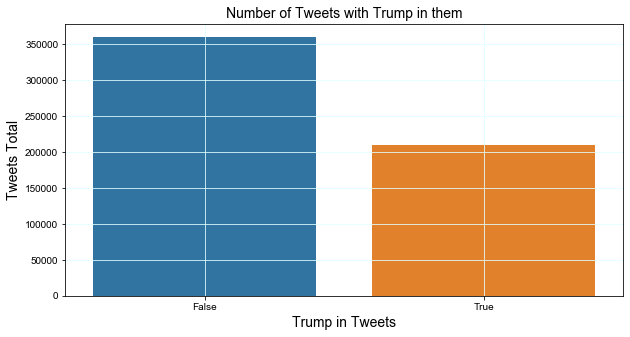

<Figure size 432x288 with 0 Axes>

In [9]:
# venezuela_tweets.Trump_in_Tweet.value_counts()

plt.figure(figsize=(10,5))
ax = sns.countplot(x='Trump_in_Tweet', data=venezuela_tweets)
sns.set(style='darkgrid')

plt.ylabel('Tweets Total', fontsize = 14)
plt.xlabel('Trump in Tweets', fontsize = 14)
plt.title('Number of Tweets with Trump in them', fontsize = 14)
plt.grid(c = 'lightcyan')

plt.show ()
# plt.savefig('img/Number_of_Tweets_with_Trump_in_them.png')

In [10]:
venezuela_tweets.Trump_in_Tweet.value_counts()


False    359767
True     209688
Name: Trump_in_Tweet, dtype: int64

In [11]:
209688/359767

0.5828438961883664

In [12]:
# plt.figure(figsize=(10, 4))
# ax = plt.subplot()
# plt.bar(range(len(venezuela_tweets.Trump_in_Tweet)),
#         venezuela_tweets.Trump_in_Tweet.values)
# ax.set_xticks(range(len(venezuela_tweets.Trump_in_Tweet)))
# ax.set_xticklabels(venezuela_tweets.Trump_in_Tweet.values)
# plt.ylabel('Number of Species')
# plt.title('Conservation Status by Species')
# plt.show()

In [13]:
# venezuela_tweets.rename(index=str, columns={'Trump in Tweet': 'Trump_in_Tweet'})


In [14]:
# venezuela_tweets.drop(['Trump Tweet'], axis=1).reset_index()

In [15]:
# venezuela_tweets.rename(index=str, columns={'Trump in Tweet': 'Trump_in_Tweet'}).reset_index()

In [16]:
venezuela_tweets.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_userid',
       'in_reply_to_tweetid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices', 'Trump_in_Tweet'],
      dtype='object')

In [17]:
venezuela_tweets['quote_count']

0         0
1         0
2         0
3         0
4         0
5         1
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        1
14        1
15        1
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
569425    0
569426    0
569427    0
569428    0
569429    0
569430    0
569431    0
569432    0
569433    0
569434    0
569435    0
569436    0
569437    0
569438    0
569439    0
569440    0
569441    0
569442    0
569443    0
569444    0
569445    0
569446    0
569447    0
569448    0
569449    0
569450    0
569451    0
569452    0
569453    0
569454    0
Name: quote_count, Length: 569455, dtype: int64

# histogram for time created. When were all the accounts created. One axis time vs number of tweets. Daily/hoursly. 
# When plotting this one. For few accounts. Histograms of tweets. Number of tweets in daily basis. See how they are in the weekends. Do for all the users. Plot for weekends. Histogram. For each tweet, distribution of retweets for all the users. How number of tweets change hourly. Do it for everyone and then for a few accounts (highest and lowest).
# After this we go to bag of words and n-grams.  

In [18]:
Trump_Tweets = venezuela_tweets[venezuela_tweets.Trump_in_Tweet]

In [19]:
Trump_Tweets.nunique

<bound method DataFrame.nunique of                     tweetid                                      userid  \
5        810901576273436673                          768237282562310144   
7        830902962574680064                          768237282562310144   
13       908378298706784256                          801463213833547776   
17      1081088935613419520                          801463213833547776   
40       812117060176097280                          751630413769113601   
41       823460289504940033                          751630413769113601   
47      1057815565740507136                          881675624401833984   
48      1051491367086641152                          881675624401833984   
49       838391722124062720                          801442896041873409   
50       844689285785706497                          801569072618029056   
53       836945186345254912  UaoSsTUDoR7SIA0dvPLYLRt70LG0VUSS3AcrE9FUE=   
56       995698214442622978                          801200139155

In [20]:
Trump_Tweets['tweet_text']

5         Michael Moore Offers to Pay $1,000 Fine for El...
7         WATCH: 9 Pro-Trump States Just DEFIED Illegal ...
13        "ALERT: Top Anti-Trump Republican Took Money F...
17        New Speaker Pelosi Refuses to Rule Out Impeach...
40        ▶ ALERT – Man Tries to Assassinate Trump, Make...
41        Liberals Are Horrified After Trump Press Secre...
47        WATCH: Jon Stewart Admits Trump is “Going to W...
48        Principal Orders Student To Remove Pro-Trump S...
49        WATCH: CNN Brings On Ben Stein To Talk About T...
50        ➡️ Kaepernick Issues Idiotic Response to Trump...
53        Former State Of The Union Speechwriter Says Tr...
56        Jimmy Kimmel: American People Have Had Enough ...
59        "The Washington Post trashes Trump’s hospital ...
62        BREAKING : President Trump Reports Fundraising...
63        Anderson Cooper Gets DEVASTATING NEWS After Sh...
64        Trump green-lights new tariffs on $200 billion...
65        "Trumps Spend $5 Million Less 

# Look at all keywords. sort based on frequency, put it together, bag of words, highest frequency. for each tweet remove stop keyword. plot words that arent stop or keyword. find emoji, if you can label emoji. Try to change everything to scatterplot, barchart, histogram, etc. 

In [21]:
venezuela_tweets.account_creation_date

0         2017-02-06
1         2017-07-31
2         2017-07-31
3         2017-08-11
4         2016-08-24
5         2016-08-24
6         2016-08-24
7         2016-08-24
8         2016-08-24
9         2016-08-24
10        2016-08-24
11        2016-08-24
12        2016-11-23
13        2016-11-23
14        2016-11-23
15        2016-11-23
16        2016-11-23
17        2016-11-23
18        2012-05-01
19        2012-05-01
20        2012-05-01
21        2012-05-01
22        2012-05-01
23        2012-05-01
24        2012-05-01
25        2012-05-01
26        2012-05-01
27        2012-05-01
28        2012-05-01
29        2012-05-01
             ...    
569425    2017-12-26
569426    2017-12-26
569427    2017-12-26
569428    2017-12-26
569429    2017-12-26
569430    2017-11-22
569431    2017-11-22
569432    2017-11-22
569433    2017-11-22
569434    2017-11-22
569435    2017-11-22
569436    2017-11-22
569437    2017-11-22
569438    2017-07-03
569439    2017-07-03
569440    2017-07-31
569441    201

In [22]:
venezuela_tweets["account_language"].value_counts()


es    569455
Name: account_language, dtype: int64

In [23]:
df_time = pd.DataFrame(pd.to_datetime( venezuela_tweets["tweet_time"] ))
df_time

,tweet_time
0,2017-03-13 13:27:00
1,2017-11-21 20:11:00
2,2018-07-20 18:22:00
3,2017-11-07 11:36:00
4,2017-03-24 13:37:00
5,2016-12-19 17:36:00
6,2016-11-14 16:26:00
7,2017-02-12 22:14:00
8,2016-10-21 23:40:00
9,2016-11-12 23:53:00


In [24]:
df_time["count"] = 1
df_time.set_index("tweet_time", inplace = True)
df_time.head()

,count
tweet_time,
2017-03-13 13:27:00,1
2017-11-21 20:11:00,1
2018-07-20 18:22:00,1
2017-11-07 11:36:00,1
2017-03-24 13:37:00,1


In [25]:
df_time['year'] = df_time.index.year
df_time['month'] = df_time.index.month
df_time['dayofweek'] = df_time.index.day_name()
easy_df = df_time.dayofweek.value_counts(sort=False)
easy_df

Tuesday      85417
Saturday     76700
Friday       84427
Sunday       70466
Monday       81853
Wednesday    85248
Thursday     85344
Name: dayofweek, dtype: int64

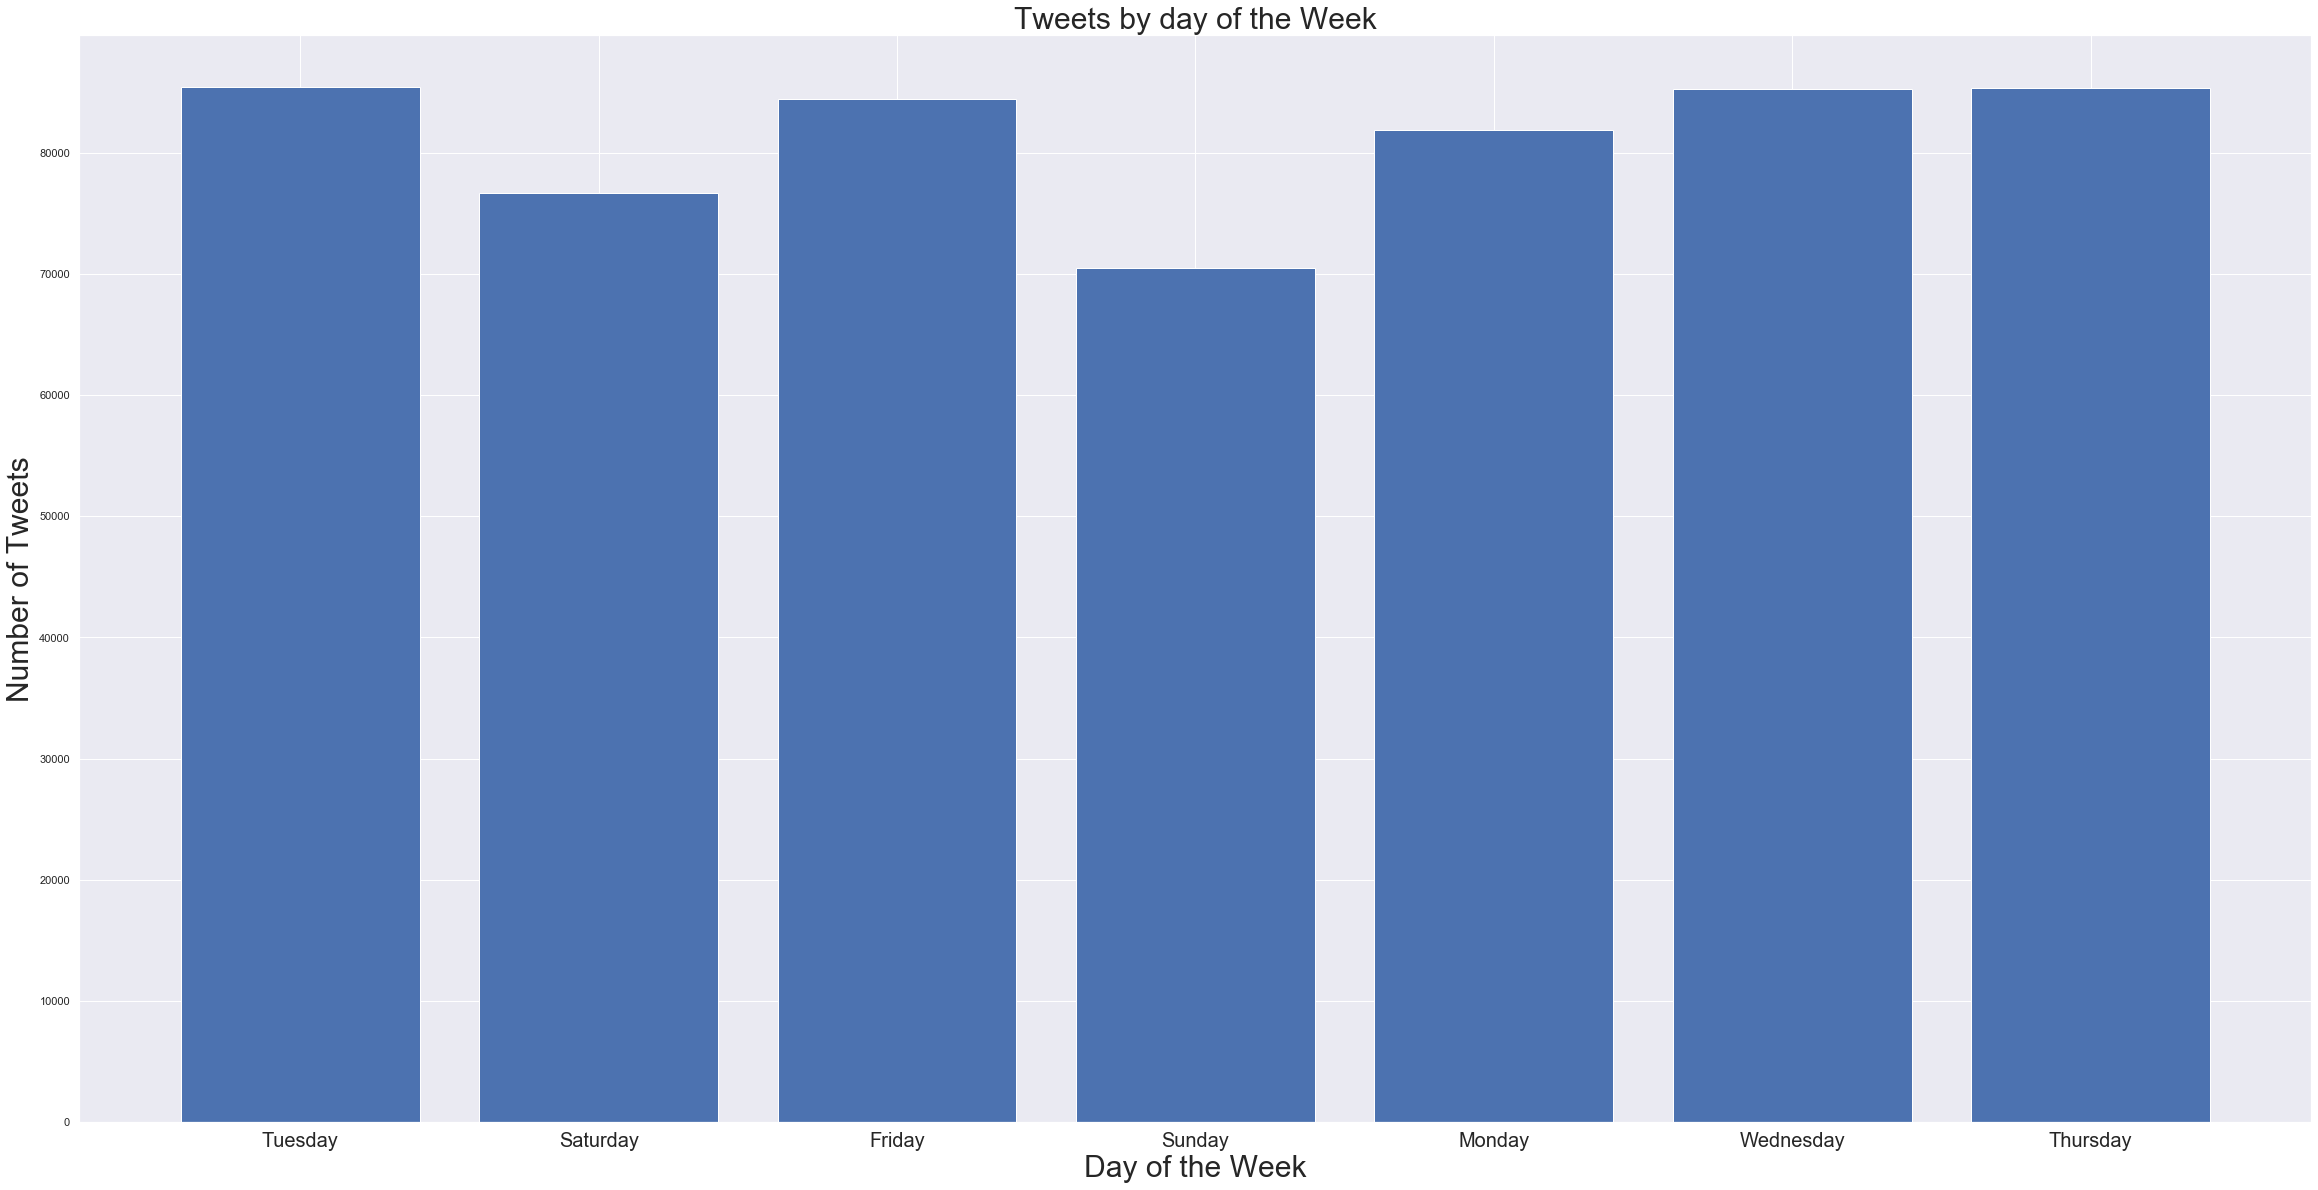

In [26]:
plt.figure(figsize=(40, 20))
ax = plt.subplot()
plt.bar(range(len(easy_df)),
        easy_df.values)
ax.set_xticks(range(len(easy_df)))
ax.set_xticklabels(easy_df.index,size=20)
plt.ylabel('Number of Tweets',size=30)
plt.xlabel('Day of the Week',size=30)
plt.title('Tweets by day of the Week',size=30)
plt.show()

In [27]:
# hourly
hourly = df_time['count'].resample('H').sum()

# daily
daily = df_time.resample('D').sum()

# monthly
monthly = df_time['count'].resample('M').sum()

# weekly
weekly = df_time.resample('W').sum()


/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


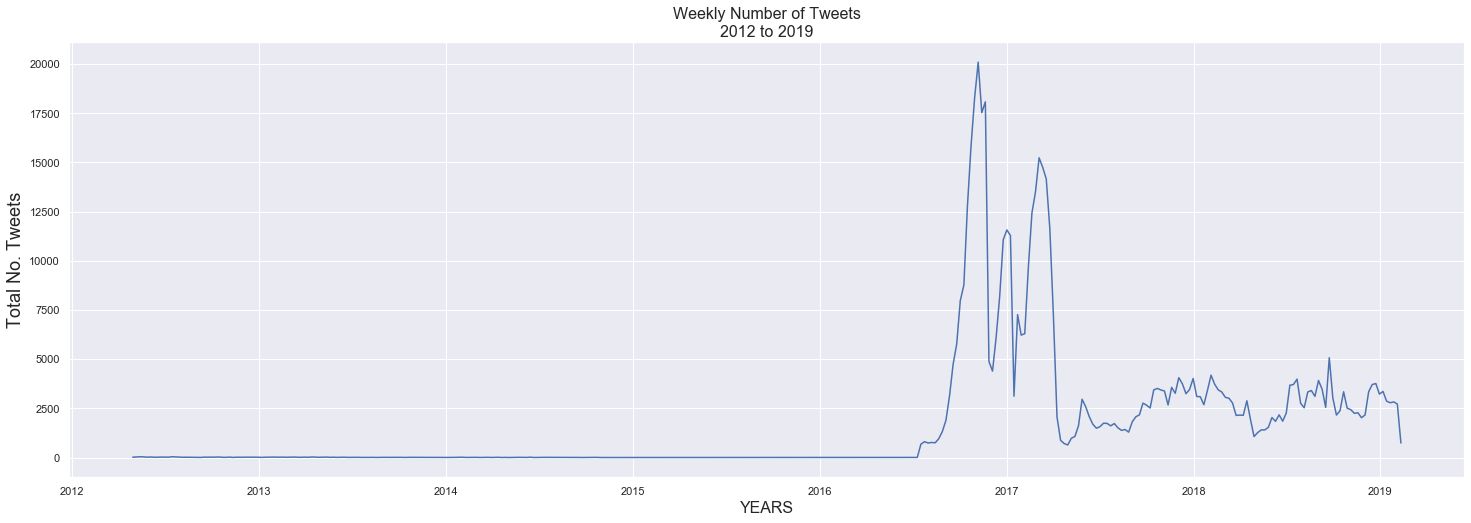

In [28]:
plt.figure(figsize=(25,8))
plt.plot(weekly['count'])
plt.xlabel('YEARS', fontsize = 16)
plt.ylabel('Total No. Tweets', fontsize = 18)
plt.title('Weekly Number of Tweets\n2012 to 2019', fontsize = 16);

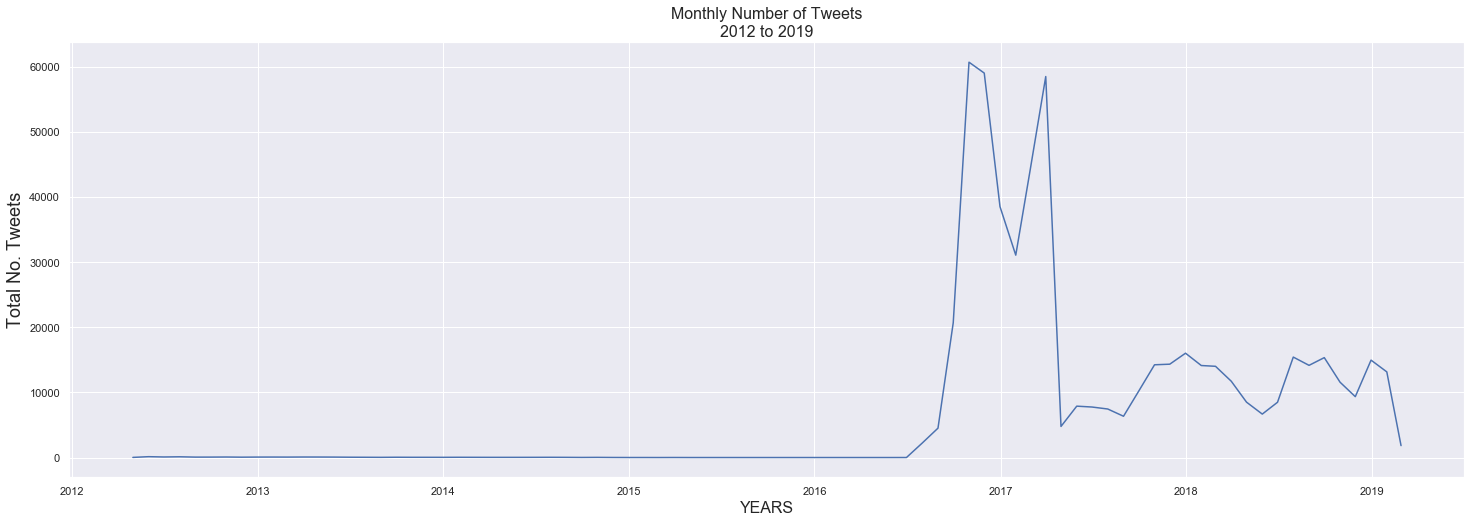

In [29]:
plt.figure(figsize=(25,8))
plt.plot(monthly)
plt.xlabel('YEARS', fontsize = 16)
plt.ylabel('Total No. Tweets', fontsize = 18)
plt.title('Monthly Number of Tweets\n2012 to 2019', fontsize = 16);

In [30]:
# data['tweet_time'] = pd.to_datetime(data['tweet_time'])
# start_date2015 = '2015-06-01'
# end_date2015 = '2016-01-01'

# mask2015 = (data['tweet_time'] > start_date2015) & (data['tweet_time'] <= end_date2015)

# data_2015 = data.loc[mask2015]

In [31]:
# tweets_mask2015 = data_2015['is_retweet'] == False
# tweets2015 = data_2015[tweets_mask2015]
# tweets_english2015 = tweets2015[ tweets2015['account_language'] == 'en']

In [32]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set(style="darkgrid")

# # Number of Tweets Over Time
# df_time2015 = pd.DataFrame(pd.to_datetime( tweets_english2015["tweet_time"] ))

# df_time2015["count"] = 1
# df_time2015.set_index("tweet_time", inplace = True)

# # monthly
# monthly2015 = df_time2015['count'].resample('M').sum()



# plt.figure(figsize=(22,8))

# plt.plot(monthly2015,  c = 'cornflowerblue', linewidth=4.0)
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)
# plt.ylabel('Tweets Total', fontsize = 24)
# plt.title('Monthly Tweet Volume', fontsize = 24)
# plt.grid(c = 'powderblue')

# plt.show()

# # plt.savefig('img/monthly_tweet_volume2015.png')

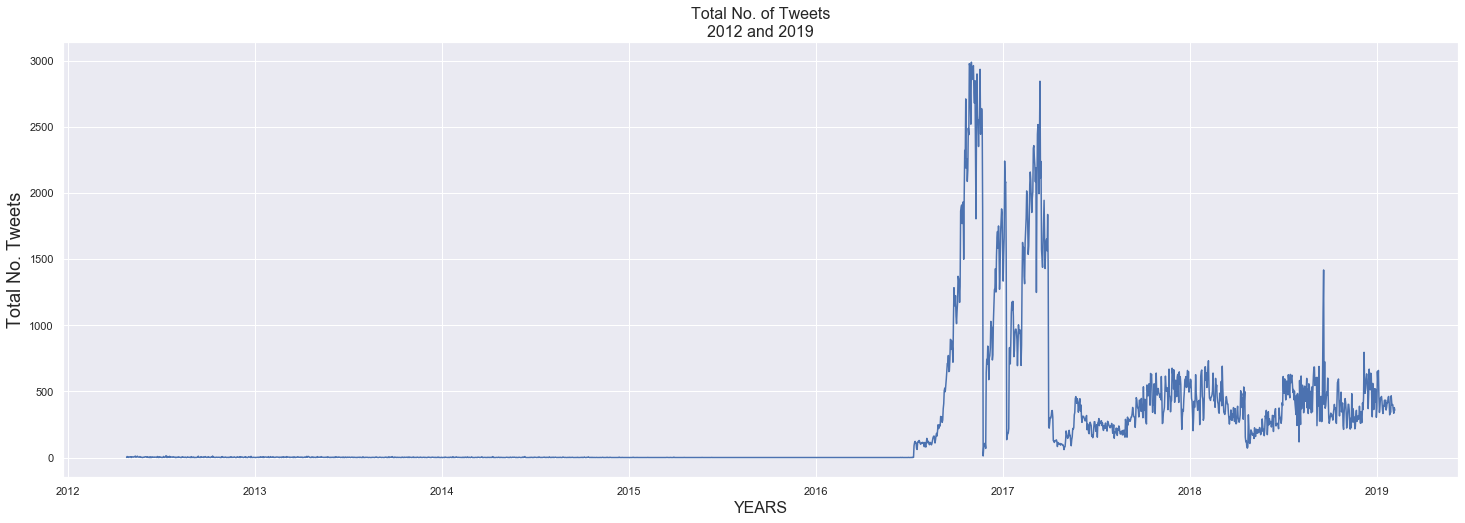

In [33]:


plt.figure(figsize=(25,8))
plt.plot(daily['count'])
plt.xlabel('YEARS', fontsize =16)
plt.ylabel('Total No. Tweets', fontsize = 18)
plt.title('Total No. of Tweets\n2012 and 2019', fontsize =16);


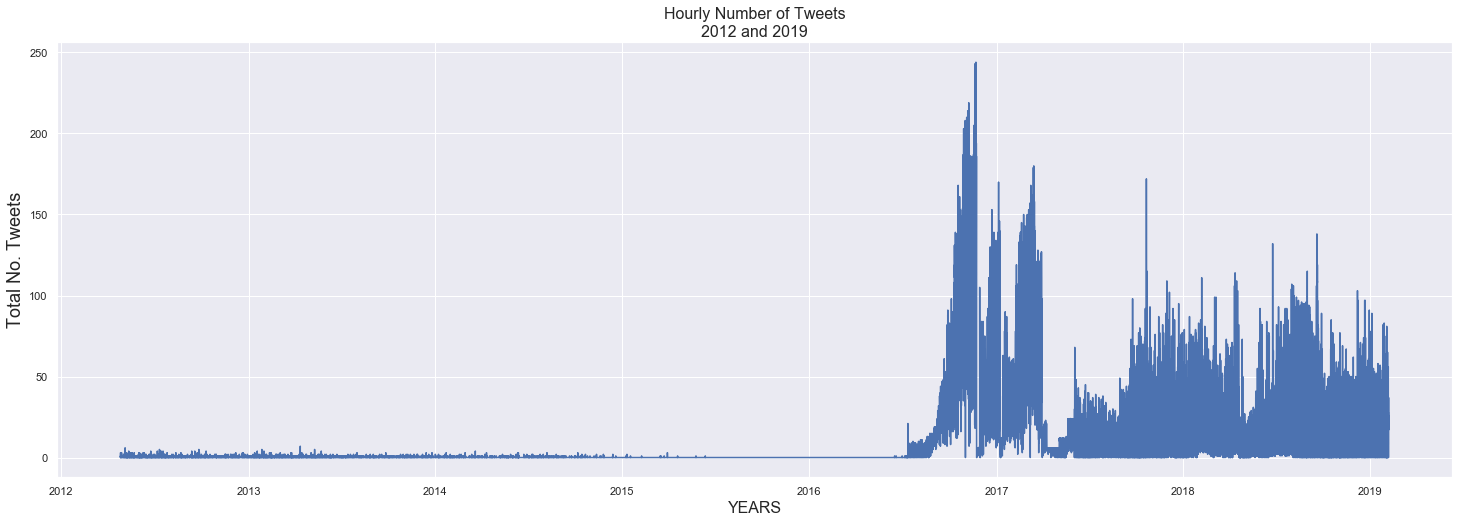

In [34]:

plt.figure(figsize=(25,8))
plt.plot(hourly)
plt.xlabel('YEARS', fontsize = 16)
plt.ylabel('Total No. Tweets', fontsize = 18)
plt.title('Hourly Number of Tweets\n2012 and 2019', fontsize = 16);

In [35]:
# I am making 2 toy subset Data Frames and 2 subsets Pandas Series 


### Retweets
retweets_mask = venezuela_tweets['is_retweet'] == True
retweets = venezuela_tweets[retweets_mask]

# Tweets
tweets_mask = venezuela_tweets['is_retweet'] == False
tweets = venezuela_tweets[tweets_mask]


tweets_english = tweets[tweets['account_language'] == 'en']
retweets_english = retweets[retweets['account_language'] == 'en']

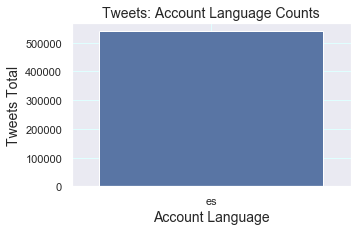

In [36]:
#Account Language for tweets and retweets

# plt.figure(figsize=(5,3))
# ax = sns.countplot(x='account_language', data=tweets)
# # ax = sns.countplot(x='account_language', data=retweets)
# sns.set(style="darkgrid")


# plt.ylabel('Retweets Total', fontsize = 14)
# plt.xlabel('Account Language', fontsize = 14)
# plt.title('Retweets: Account Language Counts', fontsize = 14)
# plt.grid(c = 'lightcyan')

# plt.show()
# plt.savefig('img/retweet_language_counts.png')



            # Account Language Tweets
plt.figure(figsize=(5,3))
ax = sns.countplot(x='account_language', data=tweets)
sns.set(style='darkgrid')

plt.ylabel('Tweets Total', fontsize = 14)
plt.xlabel('Account Language', fontsize = 14)
plt.title('Tweets: Account Language Counts', fontsize = 14)
plt.grid(c = 'lightcyan')

        
plt.show ()

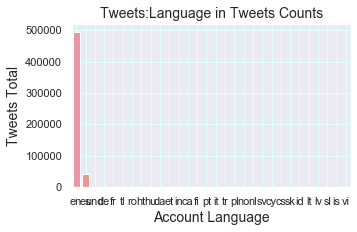

In [37]:
        # Language in Tweet body

plt.figure(figsize=(5,3))
ax = sns.countplot(x='tweet_language', data=tweets)
sns.set(style='darkgrid')
        
plt.ylabel('Tweets Total', fontsize = 14)
plt.xlabel('Account Language', fontsize = 14)
plt.title('Tweets:Language in Tweets Counts', fontsize = 14)
plt.grid(c = 'lightcyan')
        
plt.show ()

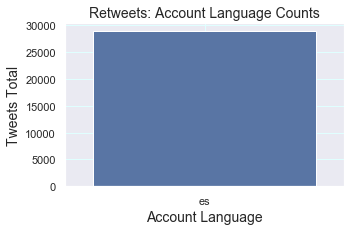

In [38]:
            # Account Language Retweets
plt.figure(figsize=(5,3))
ax = sns.countplot(x='account_language', data=retweets)
sns.set(style='darkgrid')

plt.ylabel('Tweets Total', fontsize = 14)
plt.xlabel('Account Language', fontsize = 14)
plt.title('Retweets: Account Language Counts', fontsize = 14)
plt.grid(c = 'lightcyan')

        
plt.show ()

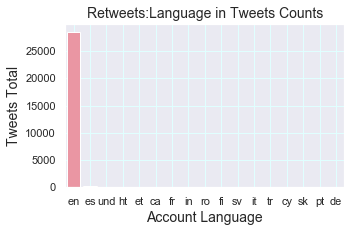

In [39]:
plt.figure(figsize=(5,3))
ax = sns.countplot(x='tweet_language', data=retweets)
sns.set(style='darkgrid')
        
plt.ylabel('Tweets Total', fontsize = 14)
plt.xlabel('Account Language', fontsize = 14)
plt.title('Retweets:Language in Tweets Counts', fontsize = 14)
plt.grid(c = 'lightcyan')
        
plt.show ()

In [40]:
# len(tweets[tweets['account_language'] == 'en']['tweet_text'])

len(tweets[tweets['account_language'] == 'en']['tweet_text'])

0

In [41]:
# len(tweets[tweets['account_language'] == 'en']['tweet_text'])

len(tweets[tweets['account_language'] == 'es']['tweet_text'])

540494

In [42]:
tweets[tweets['account_language'] == 'es']['tweet_text'].sample(8)



326609    5,000 Troops To Be Deployed To Southern Border...
167373    Breaking: They Just Declared a State of Emerge...
367922    BREAKING: Obama Just FIRED FBI Director Comey ...
211313    ➡️ Wikileaks Scares Dems After Revealing WHY H...
275941    VIDEO : Newt Wants White House Leakers Put in ...
103018    Wikileaks: Emails Show Facebook CEO Zuckerberg...
425691    "BOMBSHELL: DNC Director Reveals Truth About H...
116303    Néstor Reverol confirmó intervención de Polisu...
Name: tweet_text, dtype: object

In [43]:
# # histogram for time created. When were all the accounts created.

# plt.figure(figsize=(40, 20))
# ax = plt.subplot()
# plt.bar(range(len(venezuela_users)),
#         venezuela_users.follower_count)
# ax.set_xticks(range(len(venezuela_users.user_screen_name)))
# ax.set_xticklabels(venezuela_users.user_screen_name.values,rotation=90,size=20)
# plt.ylabel('Number of Followers',size=30)
# plt.title('Twitter Handles',size=30)
# plt.show()

In [44]:
venezuela_tweets.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_userid',
       'in_reply_to_tweetid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices', 'Trump_in_Tweet'],
      dtype='object')

In [45]:
# Median Retweet count
venezuela_tweets["retweet_count"].median()


1.0

In [46]:
viral_mask = venezuela_tweets['is_viral'] = np.where(venezuela_tweets['retweet_count'] > 100, 1, 0)
viral_mask

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
viral_counts=venezuela_tweets['is_viral'].value_counts()
viral_counts

0    569238
1       217
Name: is_viral, dtype: int64

In [48]:
### Retweets
retweets_mask = venezuela_tweets['is_retweet'] == True
retweets = venezuela_tweets[retweets_mask]

# Tweets
tweets_mask = venezuela_tweets['is_retweet'] == False
tweets = venezuela_tweets[tweets_mask]


tweets_english = tweets[tweets['account_language'] == 'en']
retweets_english = retweets[retweets['account_language'] == 'en']

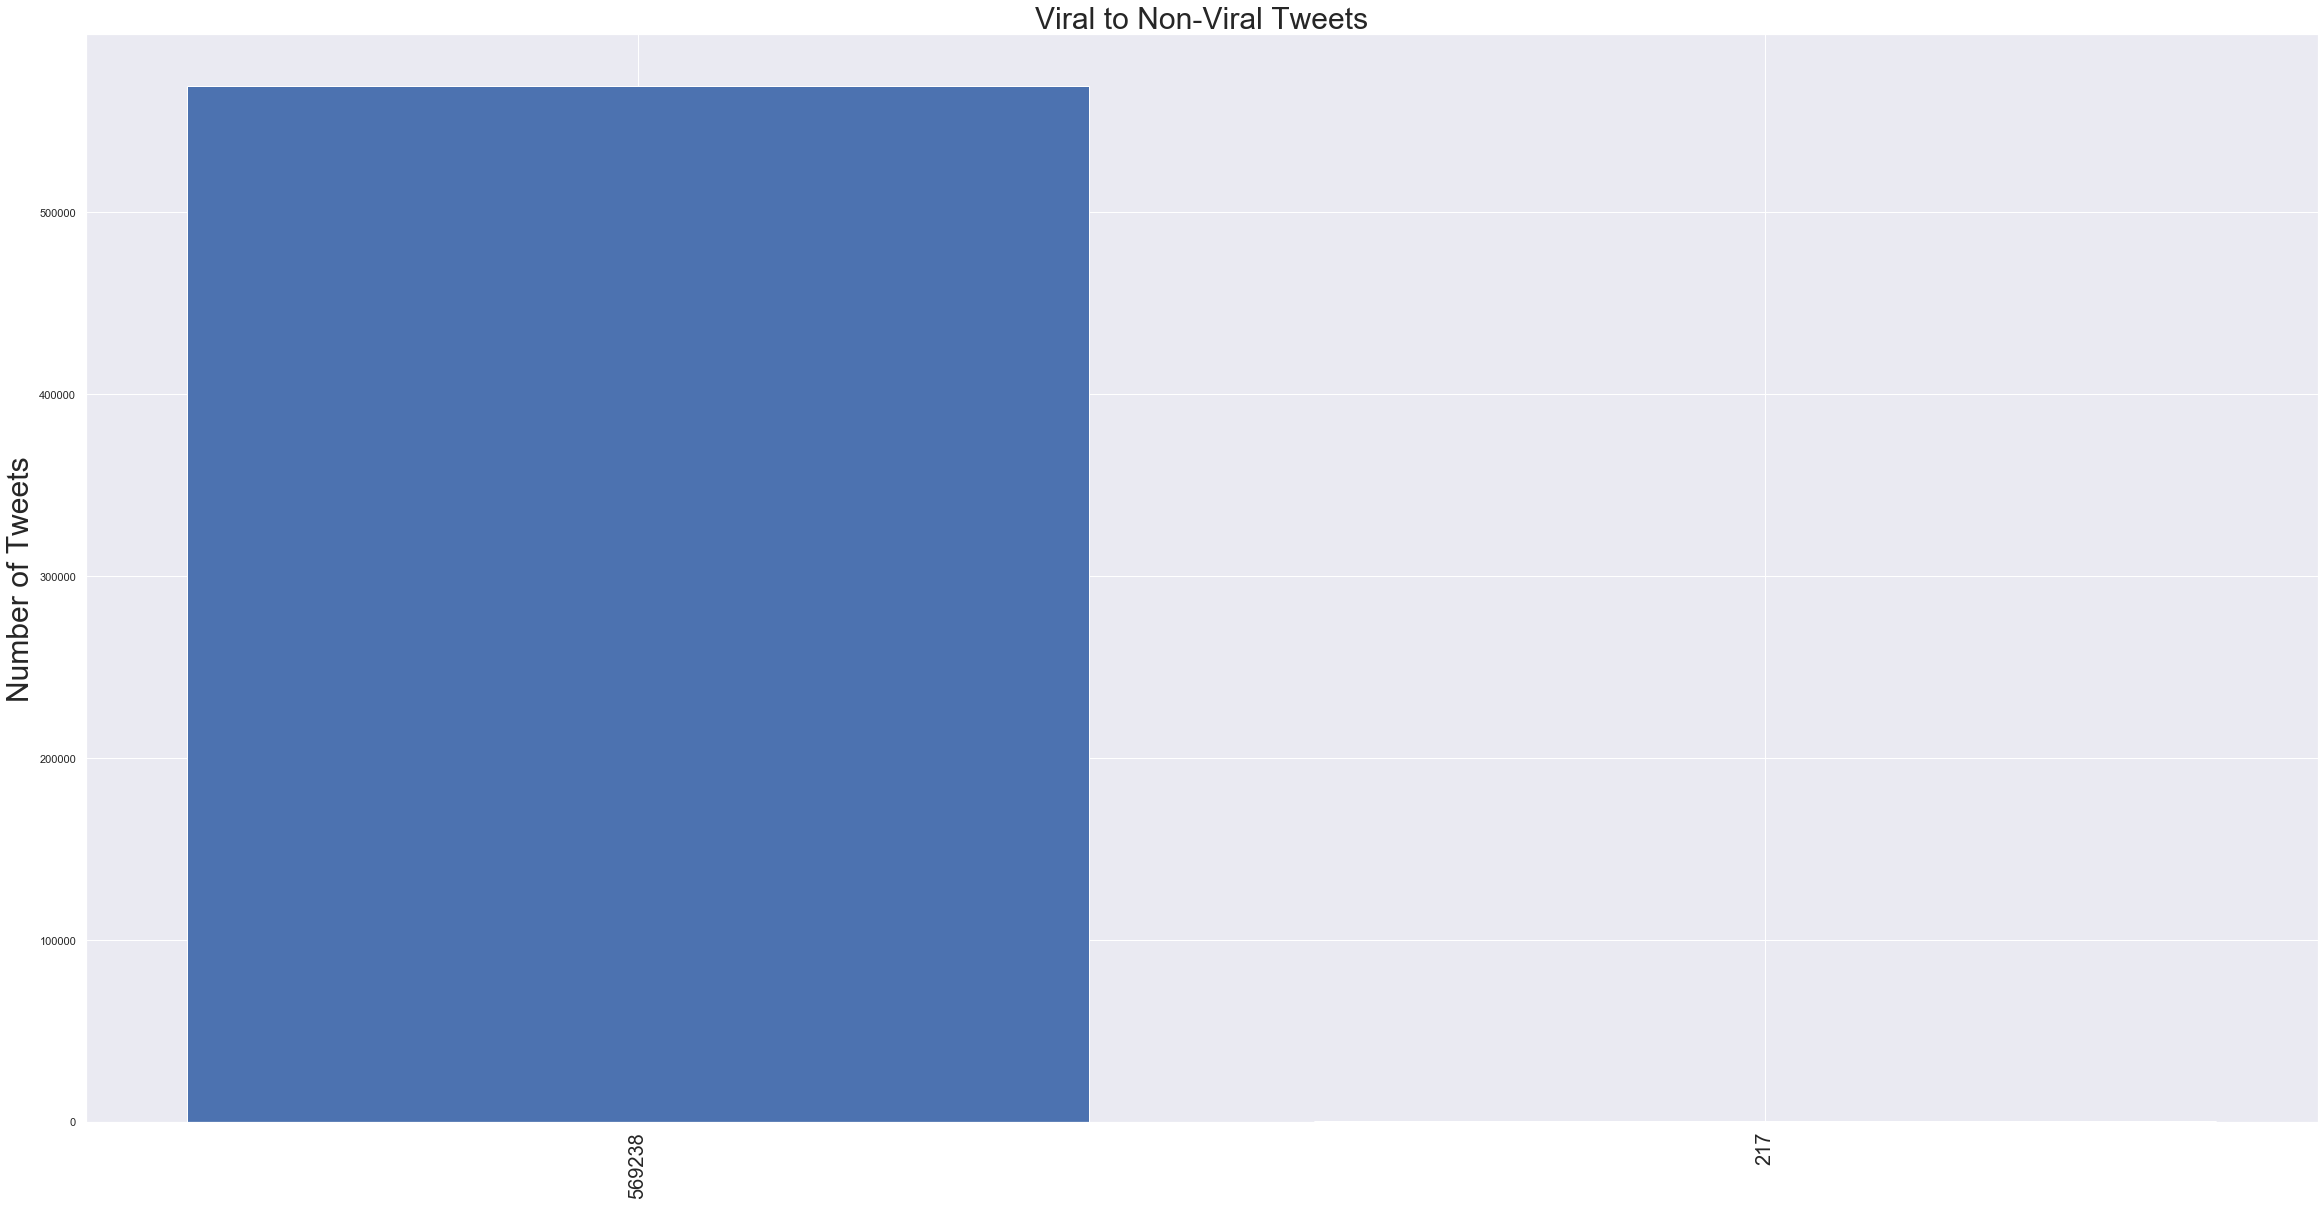

In [49]:
plt.figure(figsize=(40, 20))
ax = plt.subplot()
plt.bar(range(len(viral_counts)),
        viral_counts.values)
ax.set_xticks(range(len(viral_counts.values)))
ax.set_xticklabels(viral_counts.values,rotation=90,size=20)
plt.ylabel('Number of Tweets',size=30)
plt.title('Viral to Non-Viral Tweets',size=30)
plt.show()

spacey and kaggle organizer handles emojis